## Import Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import datetime
import numpy as np
import pandas as pd
import seaborn as sns
# import pandasql as ps
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import sklearn.metrics as metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from xgboost import XGBClassifier

## Load Data

In [ ]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('hotel_data.csv', delimiter = ',')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,314.0,NaN,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,12.0,NaN,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,200.0,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,16.0,NaN,0,Transient,57.92,0,1,Canceled,2017-08-24,5


In [ ]:
print (f'Data Shape: {df.shape}')

Data Shape: (83293, 33)


## Data Cleaning

### Check and Fix Data Types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

In [ ]:
categorical_columns = df.select_dtypes(include='object')
for columns in categorical_columns:
  print(df[columns].value_counts())
  print('====================')

hotel
Renaissance New York Times Square Hotel New York, NY                           1373
Sacramento Airport Natomas Courtyard Sacramento, CA                            1372
Las Vegas Marriott Las Vegas, NV                                               1371
Crystal Cove, Barbados Barbados                                                1360
Protea Hotel by Marriott Midrand Midrand, South Africa                         1352
                                                                               ... 
W New York – Union Square New York, NY                                         1250
The House, Barbados Barbados                                                   1249
Sheraton Grand Rio Hotel & Resort Rio de Janeiro, Brazil                       1249
African Pride Melrose Arch, Autograph Collection Johannesburg, South Africa    1246
Residence Inn Rio de Janeiro Barra da Tijuca Barra da Tijuca, Brazil           1246
Name: count, Length: 64, dtype: int64
arrival_date_month
August       

### Check Duplicated and Missing Data

In [ ]:
#drop unique identifier
df = df.drop(columns='hotel', axis =1)

In [ ]:
print (f'Duplicated Data: {df.duplicated().sum()}')

Duplicated Data: 0


In [ ]:
missing = df.isnull().sum().reset_index()
missing.columns = ['features', 'missing_values']
missing['percentage'] = (missing['missing_values']/len(df)) *100
missing

,features,missing_values,percentage
0,is_canceled,0,0.000000
1,lead_time,0,0.000000
2,arrival_date_year,0,0.000000
3,arrival_date_month,0,0.000000
4,arrival_date_week_number,0,0.000000
5,arrival_date_day_of_month,0,0.000000
6,stays_in_weekend_nights,0,0.000000
7,stays_in_week_nights,0,0.000000
8,adults,0,0.000000
9,children,3,0.003602


- Drop company column since it has >50% missing and therefore low relevance
- Fill in `children` with 0.0 for no children
- Fill in `country` with the mode (most common value)
- Fill in `agent` with 0.0 for direct bookings

In [ ]:
df = df.drop(columns=['company'])
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['agent'] = df['agent'].fillna(0)

In [ ]:
#check
df.isnull().sum()

,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0


### Data Manipulation

In [ ]:
#combine number of guests
df['total_guests'] = df['adults'] + df['children'] + df['babies']

#combine number of stays in week nights and stays in weekend nights
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

#calculate profit
df['profit'] = df['adr']*df['total_nights']

#check if customer got assigned same room type as reserved or not
df['same_room'] = (df['reserved_room_type'] == df['assigned_room_type']).astype(int)

#arrival date
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'] + '-' +
    df['arrival_date_day_of_month'].astype(str),
    errors = 'coerce'
)

When performing the arrival date combination, an error occured. After double checking the date, turns out that 2018 is NOT a leap year. So the missing values need to be rechecked.

In [ ]:
df[df['arrival_date'].isnull()]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID,total_guests,total_nights,profit,same_room,arrival_date
1565,1,117,2018,February,10,29,1,2,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,1,0,A,A,0,Non Refund,19.0,44,Transient,75.00,0,0,Canceled,2017-12-18,1566,2.0,3,225.00,1,NaT
3069,0,117,2018,February,10,29,1,2,2,0.0,0,BB,IRN,Offline TA/TO,TA/TO,0,0,0,A,A,2,No Deposit,134.0,0,Transient-Party,86.33,0,0,Check-Out,2018-03-03,3070,2.0,3,258.99,1,NaT
3081,1,138,2018,February,10,29,3,7,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,40.50,0,1,Canceled,2017-12-31,3082,2.0,10,405.00,1,NaT
3792,1,117,2018,February,10,29,1,2,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,1,0,A,A,0,Non Refund,19.0,44,Transient,75.00,0,0,Canceled,2017-12-18,3793,2.0,3,225.00,1,NaT
4488,1,21,2018,February,10,29,1,3,1,0.0,0,BB,TUR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0,Transient,102.05,0,0,Canceled,2018-02-26,4489,1.0,4,408.20,1,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77857,1,117,2018,February,10,29,1,2,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,1,0,A,A,0,Non Refund,19.0,44,Transient,75.00,0,0,Canceled,2017-12-18,77858,2.0,3,225.00,1,NaT
78926,1,50,2018,February,10,29,1,0,2,0.0,0,SC,CN,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0,Transient,76.50,0,0,Canceled,2018-02-25,78927,2.0,1,76.50,1,NaT
79306,1,40,2018,February,10,29,1,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,48.00,0,2,Canceled,2018-01-23,79307,2.0,5,240.00,1,NaT
81571,1,117,2018,February,10,29,1,2,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,1,0,A,A,0,Non Refund,19.0,44,Transient,75.00,0,0,Canceled,2017-12-18,81572,2.0,3,225.00,1,NaT


In [ ]:
len(df[df['arrival_date'].isnull()])/len(df)*100

0.07803777028081592

Since it is <1% and is an invalid date, the data can be dropped.

In [ ]:
df = df.dropna()

Ensure the number of guests is reasonable:
- No `total_guests` should be = 0
- No 2 `adults` with 10 `children` or 10 `babies` should be in 1 room

In [ ]:
df = df[df['total_guests']!=0]
df = df[(df['children']<5) & (df['babies']<5)]

In [ ]:
print(f'Data Shape: {df.shape}')

Data Shape: (83098, 36)


## Exploratory Data Analysis

### Overall Trend

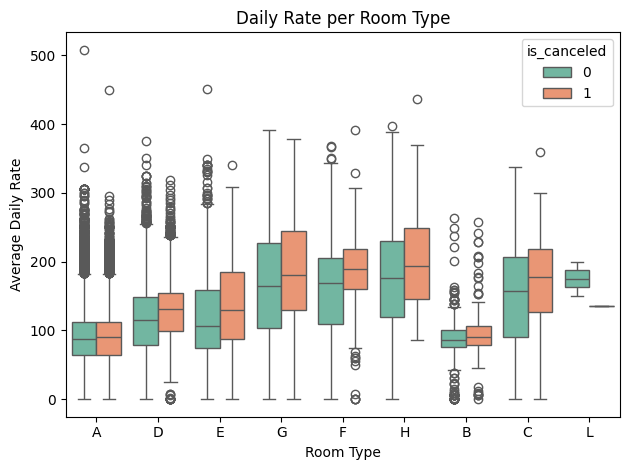

In [ ]:
data = df[df['is_canceled'] == 0]
room_order = ['A','B','C','D','E','F','G','H','L']
sns.boxplot(data = df, x = 'reserved_room_type', y = 'adr', hue ='is_canceled', palette = 'Set2')
plt.title('Daily Rate per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Daily Rate')

plt.tight_layout()
plt.show()

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
               'September', 'October', 'November', 'December']

#find change in adr per month
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)
monthly_adr = df.groupby(['arrival_date_month'])['adr'].mean().sort_index()

#find total guests per month
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)
monthly_guests = df.groupby('arrival_date_month')['total_guests'].sum().sort_index()

#find total cancellations per month
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)
monthly_cancellation_rate = df.groupby('arrival_date_month').apply(lambda x: (x['is_canceled'].sum() / len(x)))

#find total cancellations per year
yearly_cancellation_rate = df.groupby('arrival_date_year').apply(lambda x: (x['is_canceled'].sum() / len(x)))

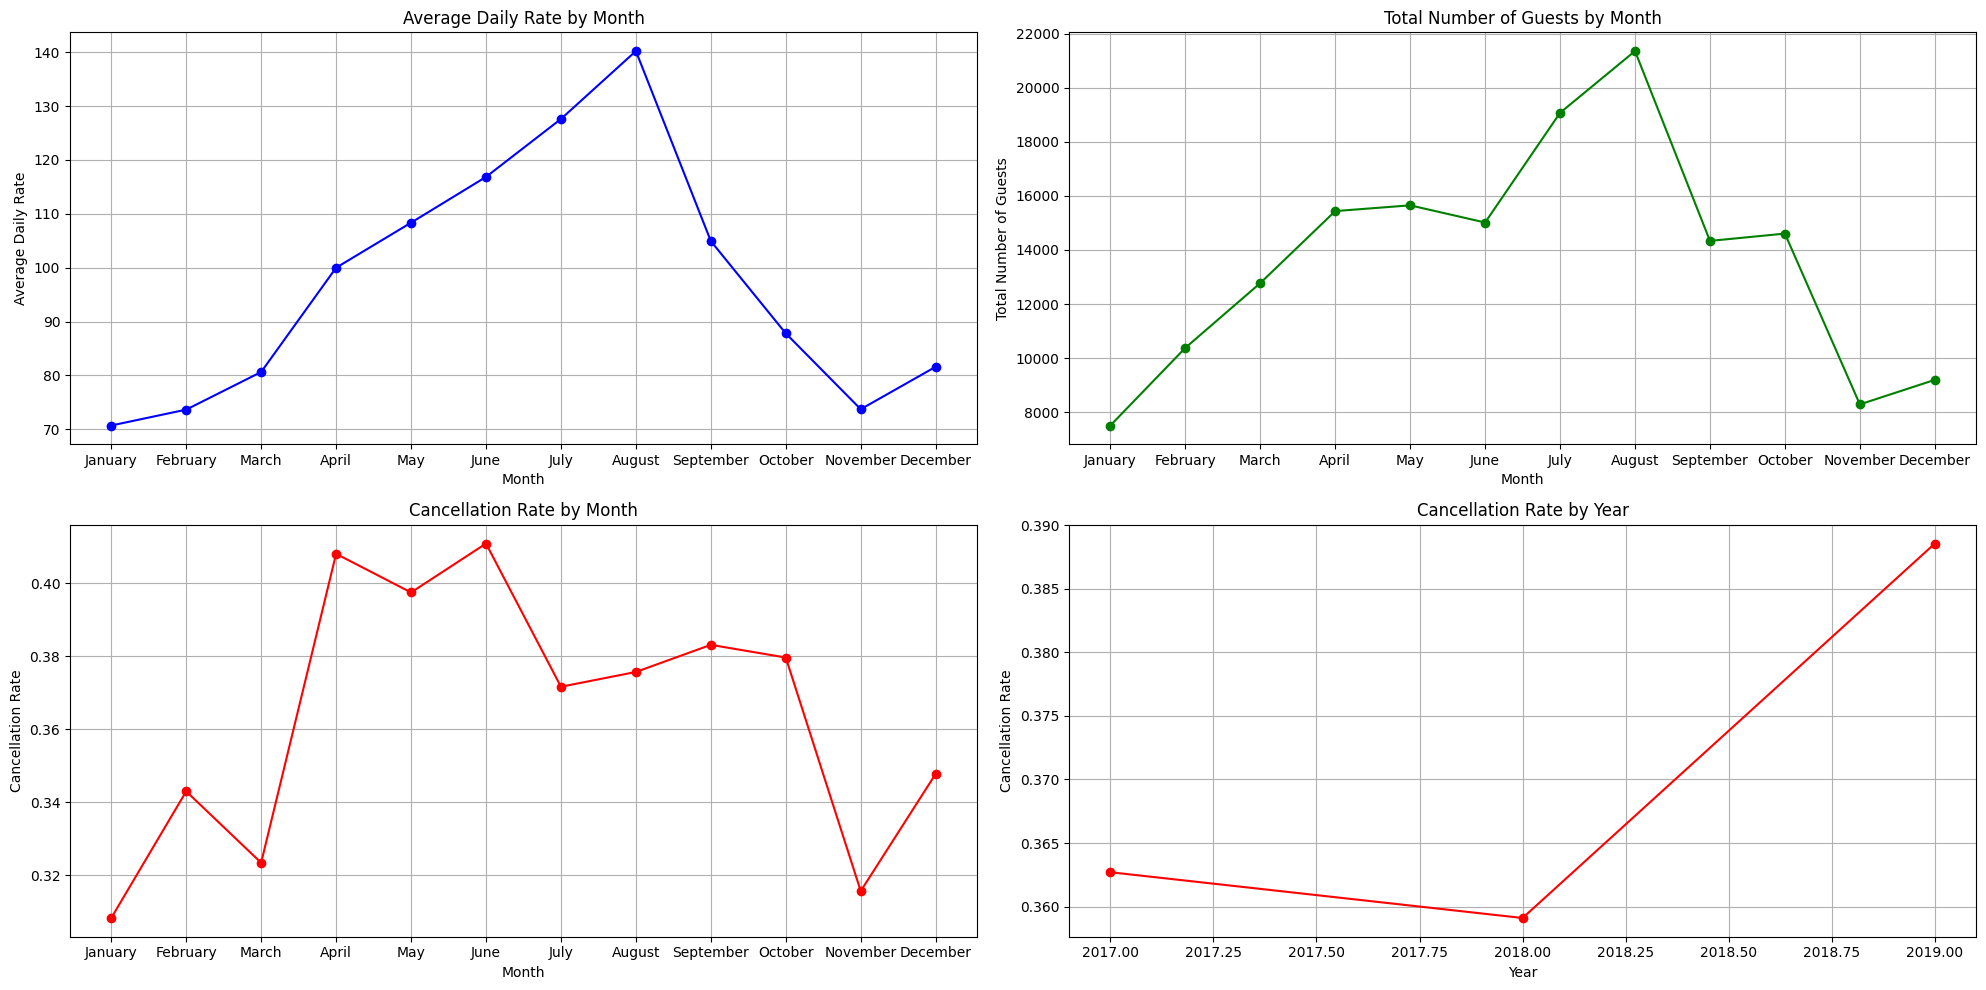

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))  # 2 rows, 2 columns of plots

#plot 1: Average Daily Rate (ADR) by Month
axes[0, 0].plot(monthly_adr, marker='o', color='b')
axes[0, 0].set_title('Average Daily Rate by Month')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Average Daily Rate')
axes[0, 0].grid(True)

#plot 2: Total Number of Guests by Month
axes[0, 1].plot(monthly_guests, marker='o', color='g')
axes[0, 1].set_title('Total Number of Guests by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Total Number of Guests')
axes[0, 1].grid(True)

#plot 3: Cancellation Rate by Month
axes[1, 0].plot(monthly_cancellation_rate, marker='o', color='r')
axes[1, 0].set_title('Cancellation Rate by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Cancellation Rate')
axes[1, 0].grid(True)

#plot 4: Cancellation Rate by Year
axes[1, 1].plot(yearly_cancellation_rate, marker='o', color='r')
axes[1, 1].set_title('Cancellation Rate by Year')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Cancellation Rate')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

### Proportion of Booking Cancellations

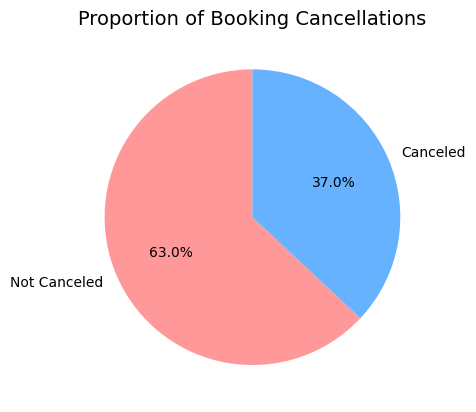

In [ ]:
cancel_count = df['is_canceled'].value_counts().reset_index()

plt.pie(x=cancel_count['count'], labels =['Not Canceled', 'Canceled'], autopct = '%1.1f%%', startangle = 90, colors=['#FF9999','#66B2FF'])
plt.title('Proportion of Booking Cancellations', fontsize=14)
plt.show()

### Categorical Variables vs. Cancellation Rate

In [ ]:
categorical = df.select_dtypes(include='object')
categorical.columns

Index(['meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

Total Countries in the dataset: 165


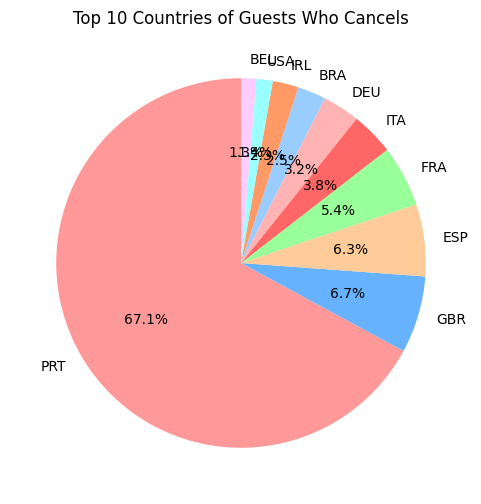

In [ ]:
df1 = df.loc[df.is_canceled == 1, :].copy()
countries = df1.groupby('country')['total_guests'].sum()

print("Total Countries in the dataset:", df['country'].nunique())

top_10_countries = countries.sort_values(ascending=False).head(10)
total_guests = top_10_countries.values
country_names = top_10_countries.index

plt.figure(figsize=(6, 6))
plt.pie(total_guests, labels=country_names, autopct='%1.1f%%', startangle=90, colors = ['#FF9999', '#66B2FF', '#FFCC99', '#99FF99', '#FF6666',
          '#FFB3B3', '#99CCFF', '#FF9966', '#99FFFF', '#FFCCFF'])
plt.title('Top 10 Countries of Guests Who Cancels')
plt.show()

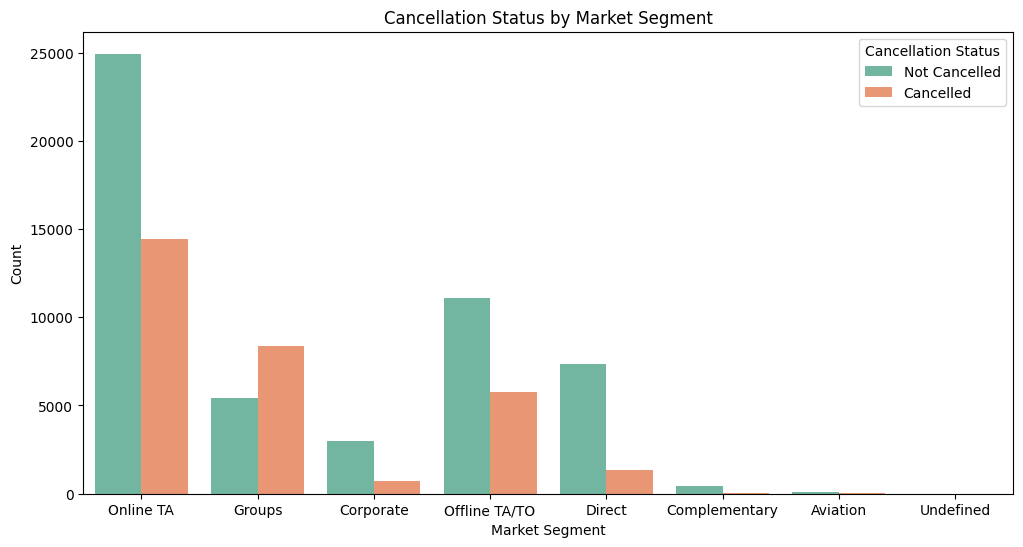

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(df, x='market_segment', hue='is_canceled', palette = 'Set2')
plt.title('Cancellation Status by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.legend(title='Cancellation Status', labels=['Not Cancelled','Cancelled'], bbox_to_anchor=(1,1))
plt.show()

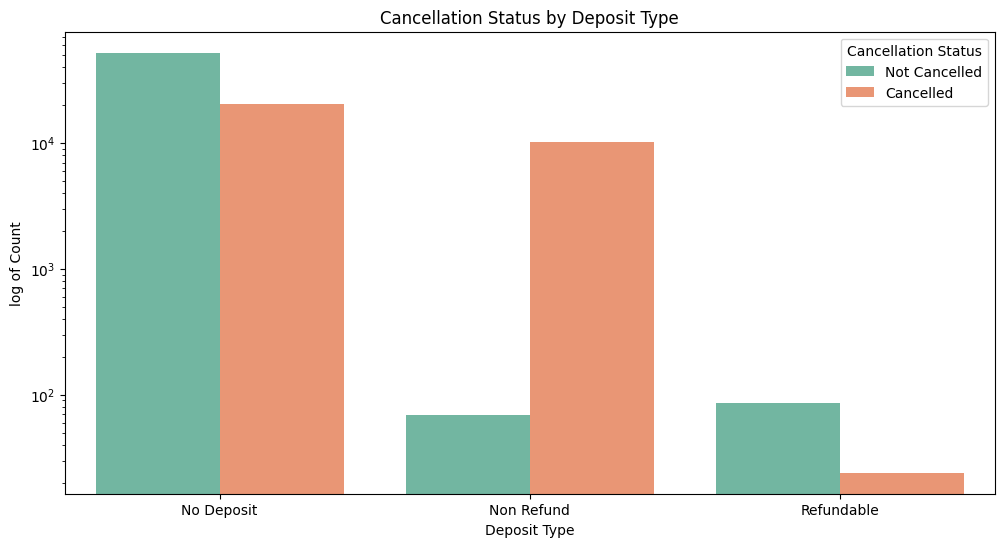

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(df, x='deposit_type', hue='is_canceled', palette = 'Set2')
plt.title('Cancellation Status by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('log of Count')
plt.yscale('log')
plt.legend(title='Cancellation Status', labels=['Not Cancelled','Cancelled'], bbox_to_anchor=(1,1))
plt.show()

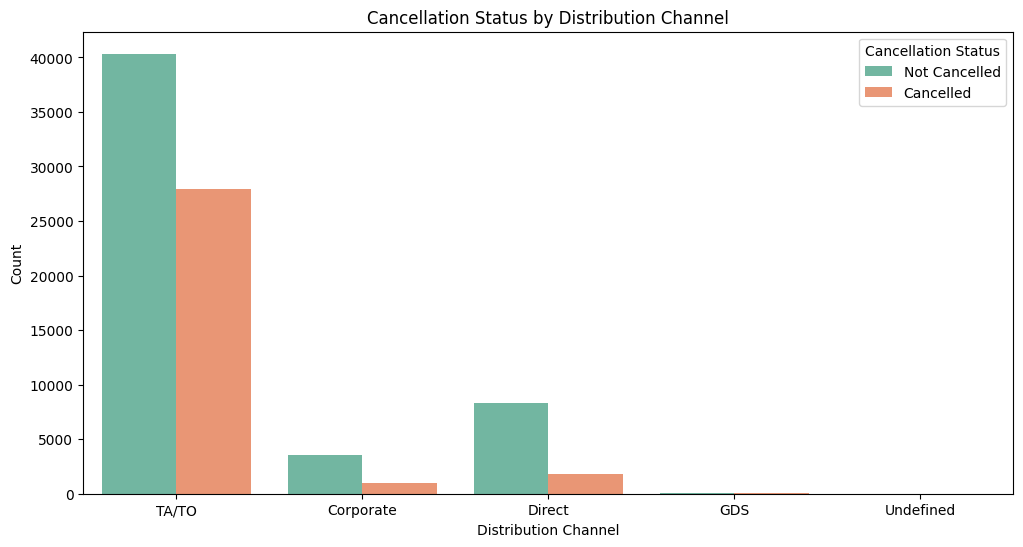

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(df, x='distribution_channel', hue='is_canceled', palette = 'Set2')
plt.title('Cancellation Status by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Count')
plt.legend(title='Cancellation Status', labels=['Not Cancelled','Cancelled'], bbox_to_anchor=(1,1))
plt.show()

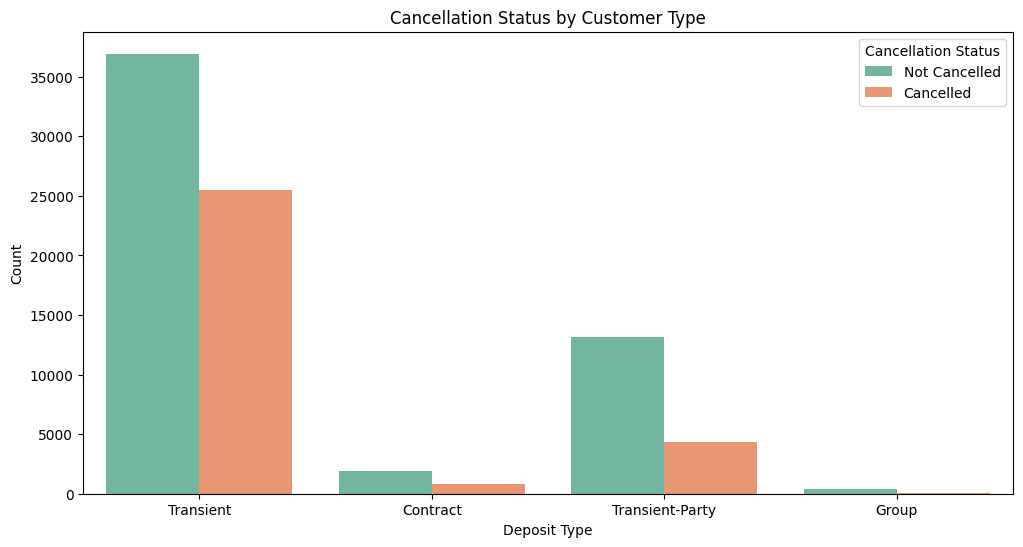

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(df, x='customer_type', hue='is_canceled', palette = 'Set2')
plt.title('Cancellation Status by Customer Type')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.legend(title='Cancellation Status', labels=['Not Cancelled','Cancelled'], bbox_to_anchor=(1,1))
plt.show()

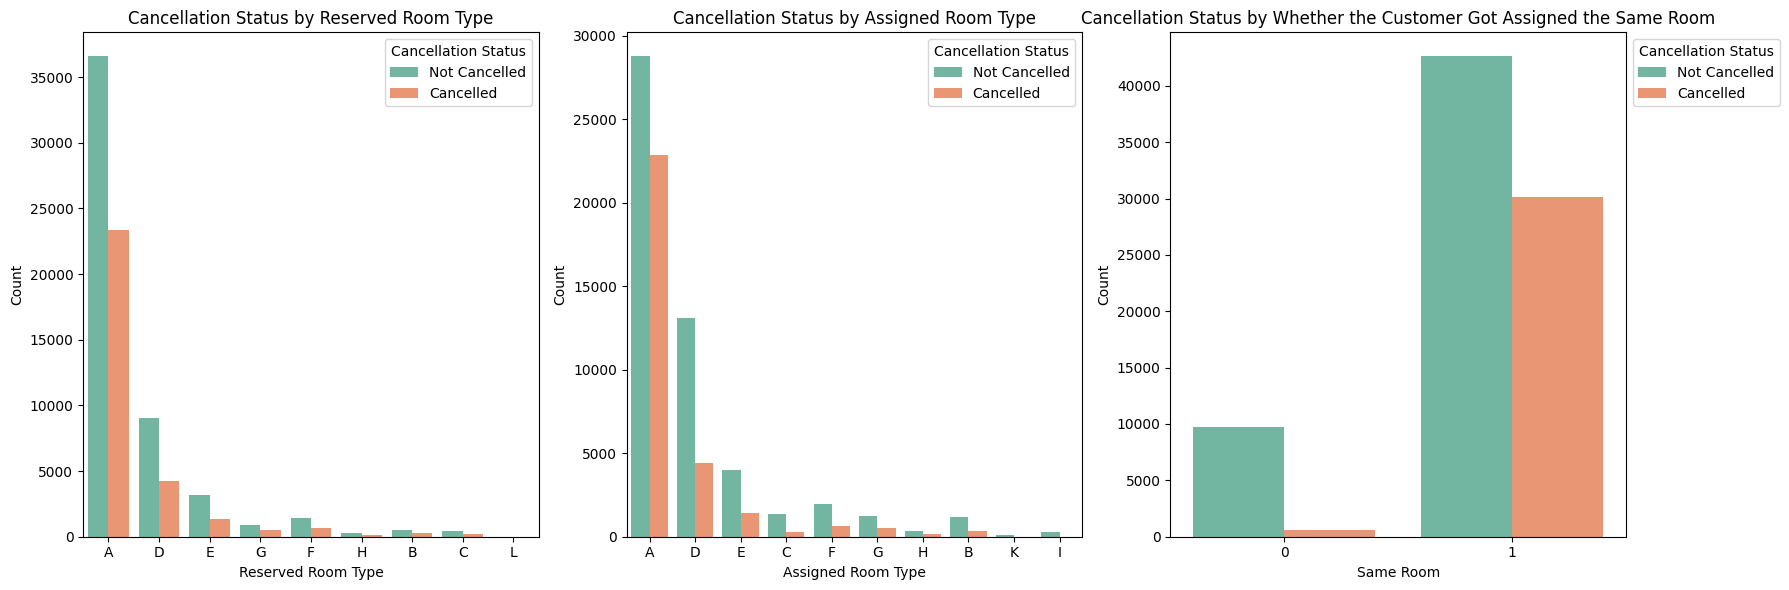

In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.countplot(data=df, x='reserved_room_type', hue='is_canceled', palette='Set2')
plt.title('Cancellation Status by Reserved Room Type')
plt.xlabel('Reserved Room Type')
plt.ylabel('Count')
plt.legend(title='Cancellation Status', labels=['Not Cancelled','Cancelled'], bbox_to_anchor=(1,1))

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='assigned_room_type', hue='is_canceled', palette='Set2')
plt.title('Cancellation Status by Assigned Room Type')
plt.xlabel('Assigned Room Type')
plt.ylabel('Count')
plt.legend(title='Cancellation Status', labels=['Not Cancelled','Cancelled'], bbox_to_anchor=(1,1))

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='same_room', hue='is_canceled', palette='Set2')
plt.title('Cancellation Status by Whether the Customer Got Assigned the Same Room')
plt.xlabel('Same Room')
plt.ylabel('Count')
plt.legend(title='Cancellation Status', labels=['Not Cancelled','Cancelled'], bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

### Numerical Variables vs. Cancellation Rate

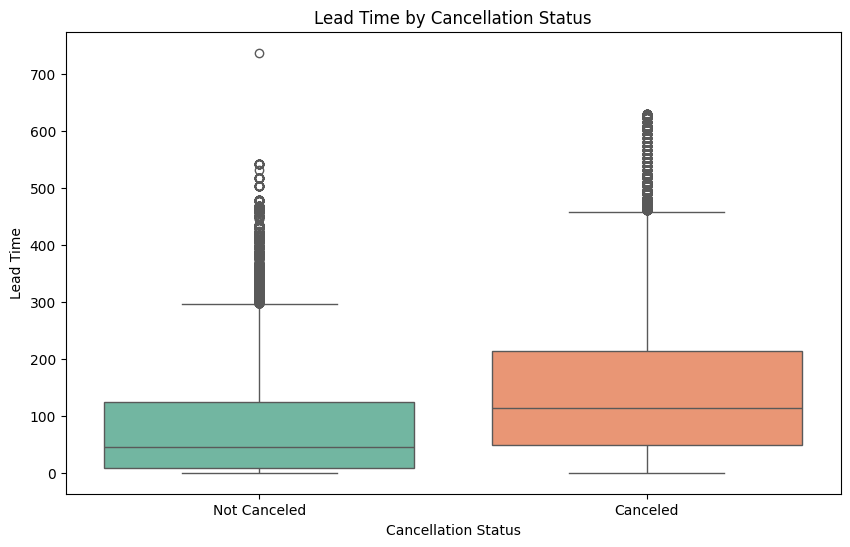

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_canceled', y='lead_time', palette='Set2')
plt.title('Lead Time by Cancellation Status')
plt.xlabel('Cancellation Status')
plt.ylabel('Lead Time')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

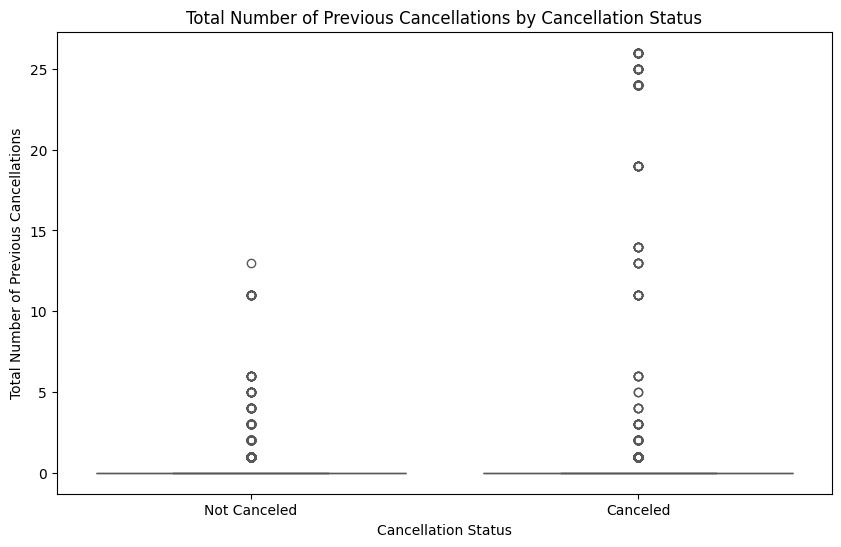

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_canceled', y='previous_cancellations', palette='Set2')
plt.title('Total Number of Previous Cancellations by Cancellation Status')
plt.xlabel('Cancellation Status')
plt.ylabel('Total Number of Previous Cancellations')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

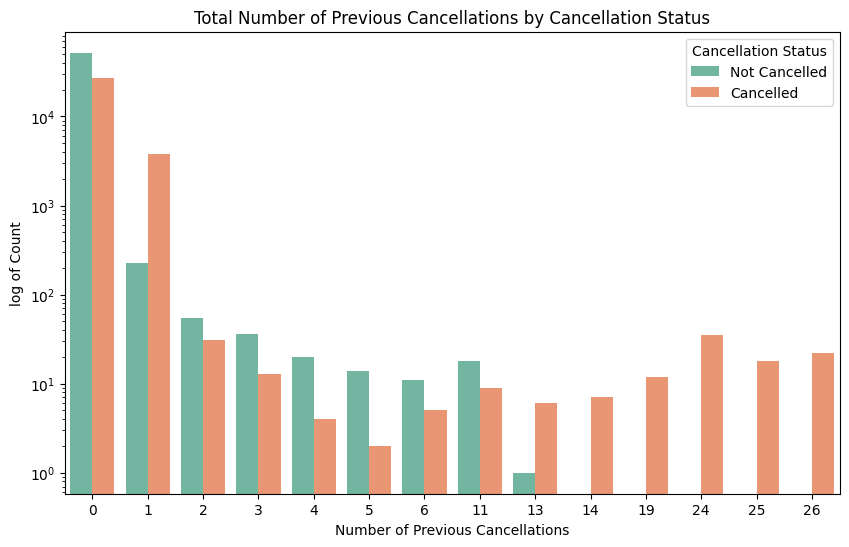

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='previous_cancellations', hue='is_canceled', palette='Set2')
plt.title('Total Number of Previous Cancellations by Cancellation Status')
plt.xlabel('Number of Previous Cancellations')
plt.ylabel('log of Count')
plt.yscale('log') #since data is highly skewed, logrithmic scale compresses the higher values and expand the lower ones
plt.legend(title='Cancellation Status', labels=['Not Cancelled','Cancelled'], bbox_to_anchor=(1,1))

plt.show()

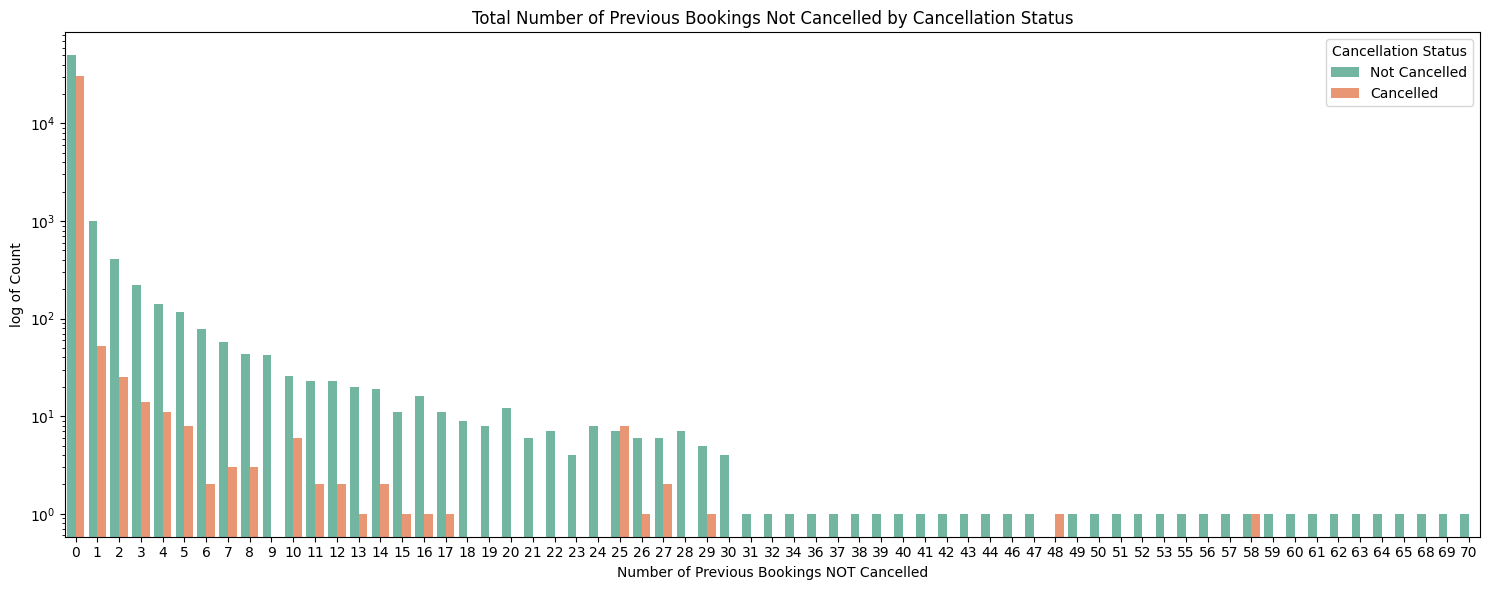

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='previous_bookings_not_canceled', hue='is_canceled', palette='Set2')
plt.title('Total Number of Previous Bookings Not Cancelled by Cancellation Status')
plt.xlabel('Number of Previous Bookings NOT Cancelled')
plt.ylabel('log of Count')
plt.yscale('log')
plt.legend(title='Cancellation Status', labels=['Not Cancelled','Cancelled'], bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

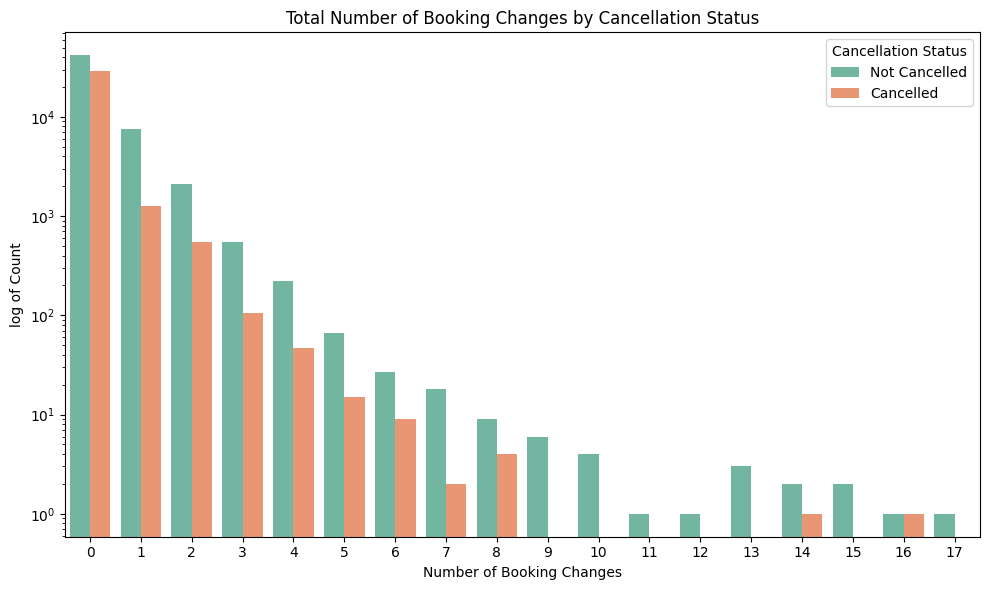

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='booking_changes', hue='is_canceled', palette='Set2')
plt.title('Total Number of Booking Changes by Cancellation Status')
plt.xlabel('Number of Booking Changes')
plt.ylabel('log of Count')
plt.yscale('log')
plt.legend(title='Cancellation Status', labels=['Not Cancelled','Cancelled'], bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

In [ ]:
df['days_in_waiting_list'].describe()

,days_in_waiting_list
count,83098.000000
mean,2.341175
std,17.814518
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,391.000000


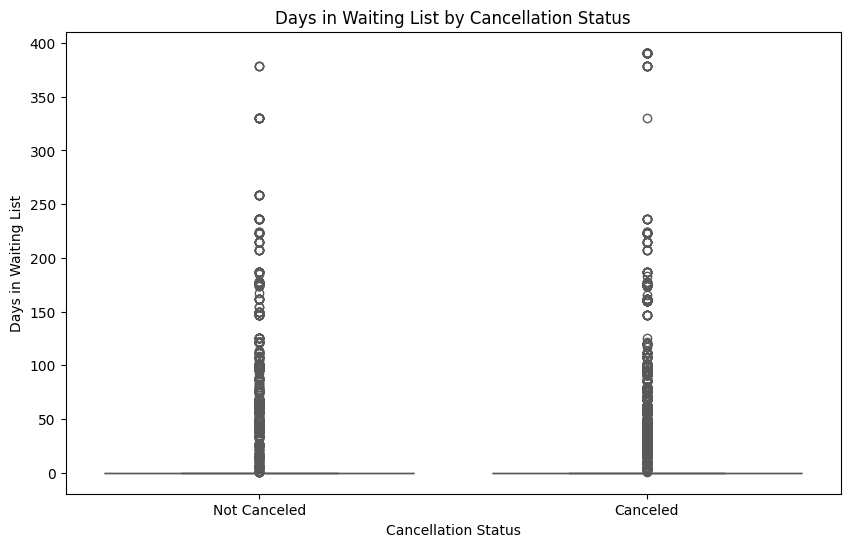

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_canceled', y='days_in_waiting_list', palette='Set2')
plt.title('Days in Waiting List by Cancellation Status')
plt.xlabel('Cancellation Status')
plt.ylabel('Days in Waiting List')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

In [ ]:
df[df['is_canceled']==0]['adr'].describe()

,adr
count,52369.000000
mean,100.195975
std,49.068431
min,0.000000
25%,68.000000
50%,93.000000
75%,125.000000
max,508.000000


In [ ]:
df[df['is_canceled']==1]['adr'].describe()

,adr
count,30729.000000
mean,104.753646
std,45.931835
min,0.000000
25%,72.250000
50%,96.000000
75%,127.200000
max,450.000000


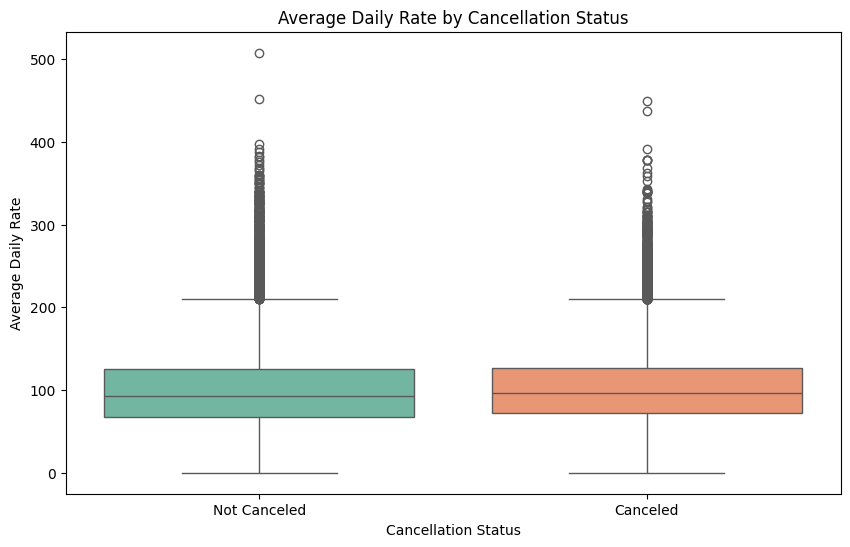

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_canceled', y='adr', palette='Set2')
plt.title('Average Daily Rate by Cancellation Status')
plt.xlabel('Cancellation Status')
plt.ylabel('Average Daily Rate')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

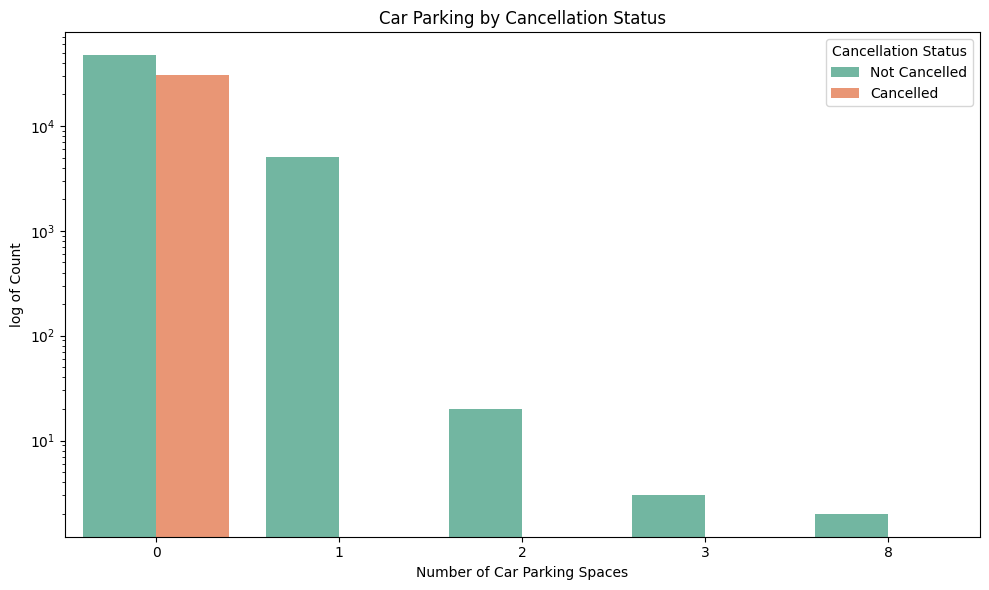

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='required_car_parking_spaces', hue='is_canceled', palette='Set2')
plt.title('Car Parking by Cancellation Status')
plt.xlabel('Number of Car Parking Spaces')
plt.ylabel('log of Count')
plt.yscale('log')
plt.legend(title='Cancellation Status', labels=['Not Cancelled','Cancelled'], bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

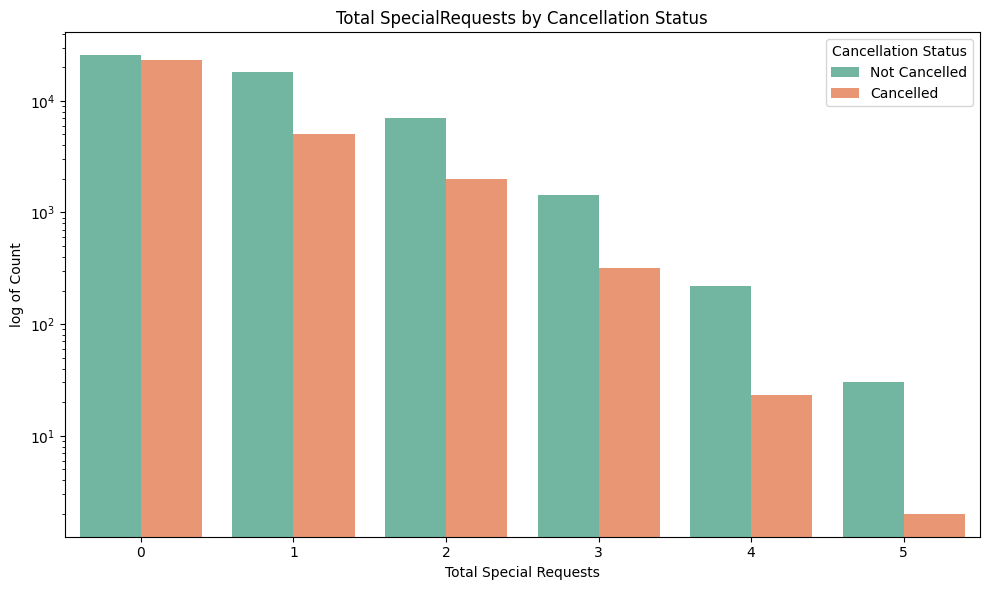

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='total_of_special_requests', hue='is_canceled', palette='Set2')
plt.title('Total SpecialRequests by Cancellation Status')
plt.xlabel('Total Special Requests')
plt.ylabel('log of Count')
plt.yscale('log')
plt.legend(title='Cancellation Status', labels=['Not Cancelled','Cancelled'], bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

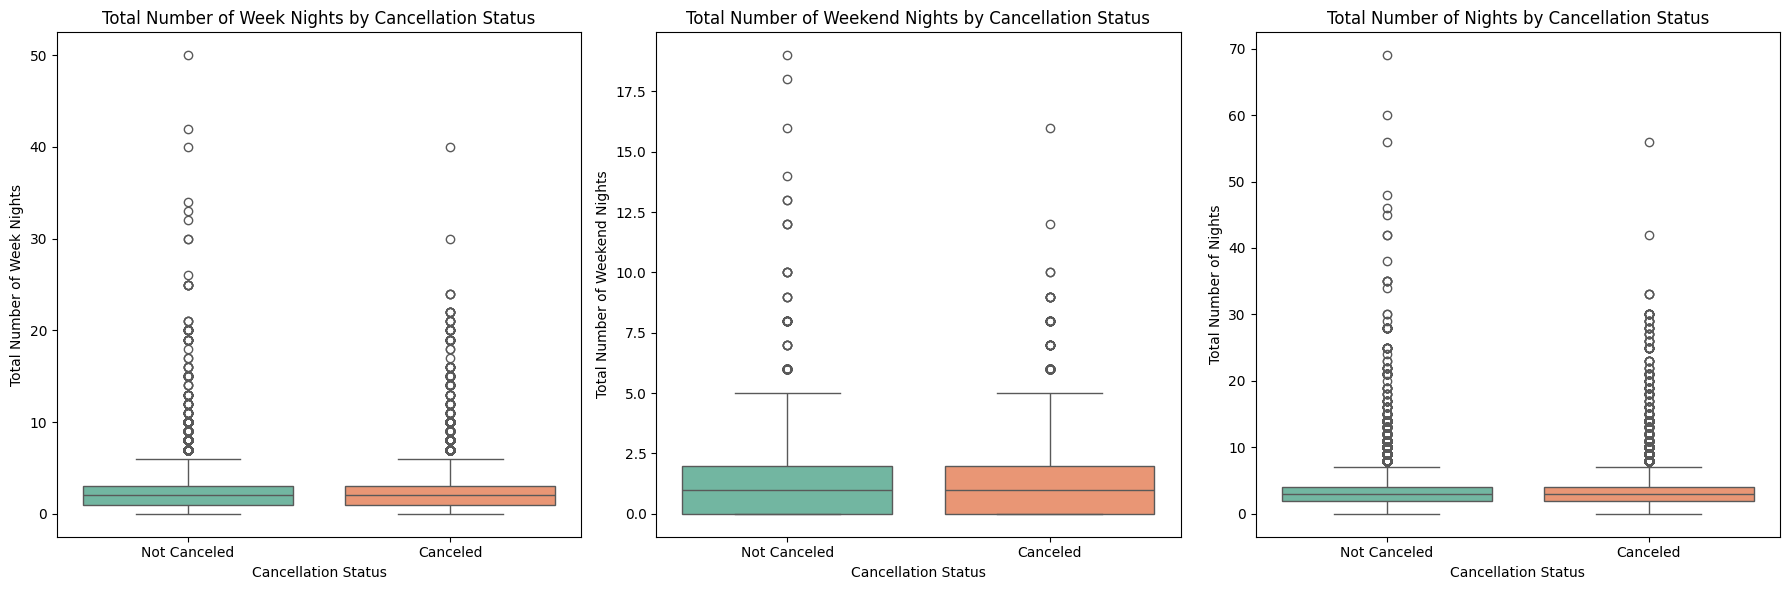

In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='is_canceled', y='stays_in_week_nights', palette='Set2')
plt.title('Total Number of Week Nights by Cancellation Status')
plt.xlabel('Cancellation Status')
plt.ylabel('Total Number of Week Nights')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='is_canceled', y='stays_in_weekend_nights', palette='Set2')
plt.title('Total Number of Weekend Nights by Cancellation Status')
plt.xlabel('Cancellation Status')
plt.ylabel('Total Number of Weekend Nights')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='is_canceled', y='total_nights', palette='Set2')
plt.title('Total Number of Nights by Cancellation Status')
plt.xlabel('Cancellation Status')
plt.ylabel('Total Number of Nights')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])

plt.tight_layout()
plt.show()

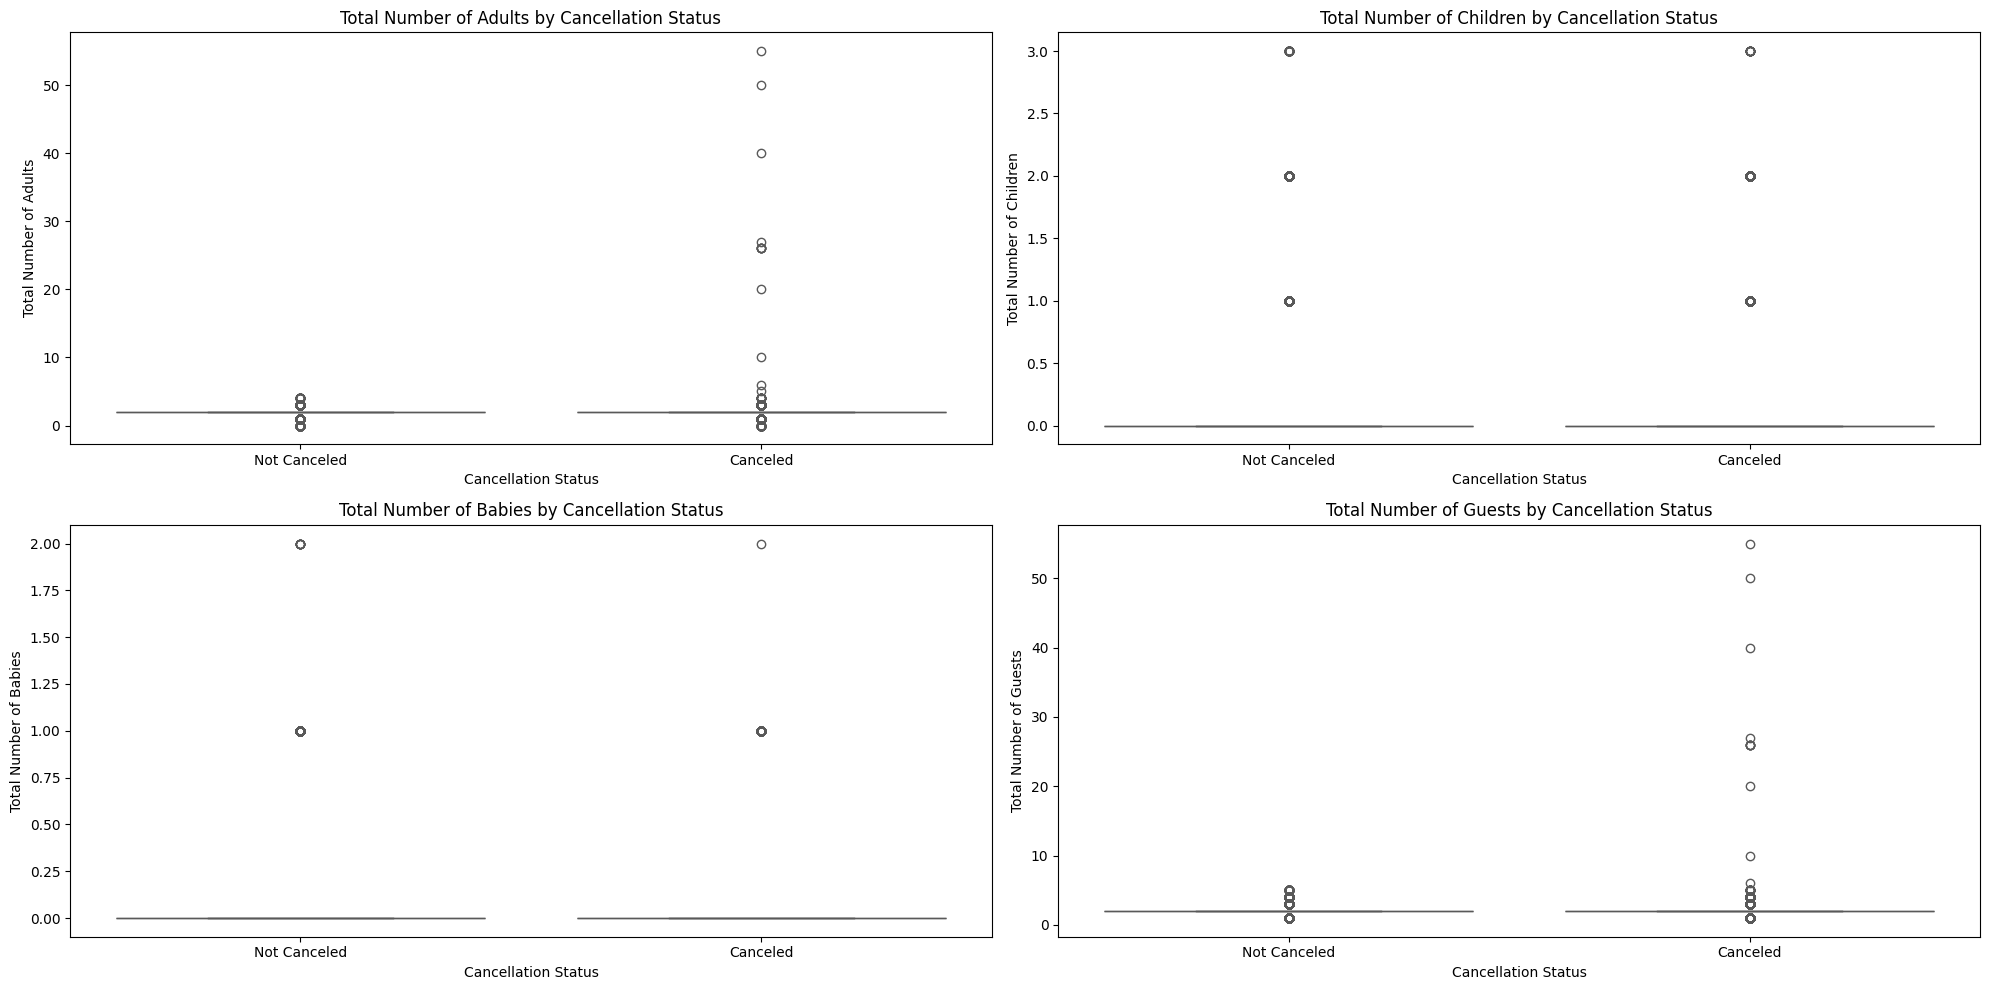

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='is_canceled', y='adults', palette='Set2')
plt.title('Total Number of Adults by Cancellation Status')
plt.xlabel('Cancellation Status')
plt.ylabel('Total Number of Adults')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='is_canceled', y='children', palette='Set2')
plt.title('Total Number of Children by Cancellation Status')
plt.xlabel('Cancellation Status')
plt.ylabel('Total Number of Children')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])

plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='is_canceled', y='babies', palette='Set2')
plt.title('Total Number of Babies by Cancellation Status')
plt.xlabel('Cancellation Status')
plt.ylabel('Total Number of Babies')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])

plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='is_canceled', y='total_guests', palette='Set2')
plt.title('Total Number of Guests by Cancellation Status')
plt.xlabel('Cancellation Status')
plt.ylabel('Total Number of Guests')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])

plt.tight_layout()
plt.show()

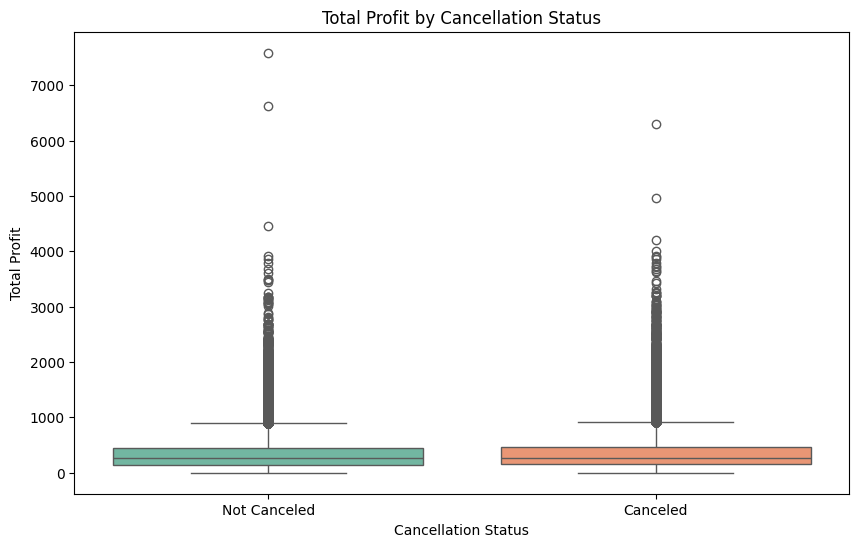

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_canceled', y='profit', palette='Set2')
plt.title('Total Profit by Cancellation Status')
plt.xlabel('Cancellation Status')
plt.ylabel('Total Profit')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

## Data Preprocessing

### Feature Selection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83098 entries, 0 to 83292
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   is_canceled                     83098 non-null  int64         
 1   lead_time                       83098 non-null  int64         
 2   arrival_date_year               83098 non-null  int64         
 3   arrival_date_month              83098 non-null  category      
 4   arrival_date_week_number        83098 non-null  int64         
 5   arrival_date_day_of_month       83098 non-null  int64         
 6   stays_in_weekend_nights         83098 non-null  int64         
 7   stays_in_week_nights            83098 non-null  int64         
 8   adults                          83098 non-null  int64         
 9   children                        83098 non-null  float64       
 10  babies                          83098 non-null  int64         
 11  meal   

In [ ]:
print(f'Data Shape: {df.shape}')

Data Shape: (83098, 36)


In [ ]:
df.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'bookingID',
       'total_guests', 'total_nights', 'profit', 'same_room', 'arrival_date'],
      dtype='object')

In [ ]:
#drop uneccesary columns
df = df.drop(columns=['arrival_date_year','arrival_date_month','arrival_date_week_number', 'arrival_date_day_of_month',
                      'country', 'assigned_room_type','bookingID',
                      'reservation_status','reservation_status_date', 'arrival_date'], axis = 1)

In [ ]:
numerical_df = df.select_dtypes(include='number')

In [ ]:
X = numerical_df.copy()
X['constant'] = 1

#calculate VIF scores
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
}).sort_values(by='VIF', ascending=False)

print(vif_data)

                          Variable        VIF
2          stays_in_weekend_nights        inf
3             stays_in_week_nights        inf
4                           adults        inf
5                         children        inf
6                           babies        inf
17                    total_nights        inf
16                    total_guests        inf
20                        constant  27.355573
18                          profit   6.509670
13                             adr   3.124459
7                is_repeated_guest   1.293260
0                      is_canceled   1.272492
9   previous_bookings_not_canceled   1.260121
1                        lead_time   1.212927
15       total_of_special_requests   1.135327
19                       same_room   1.111401
11                           agent   1.077445
14     required_car_parking_spaces   1.074791
10                 booking_changes   1.051326
8           previous_cancellations   1.050740
12            days_in_waiting_list

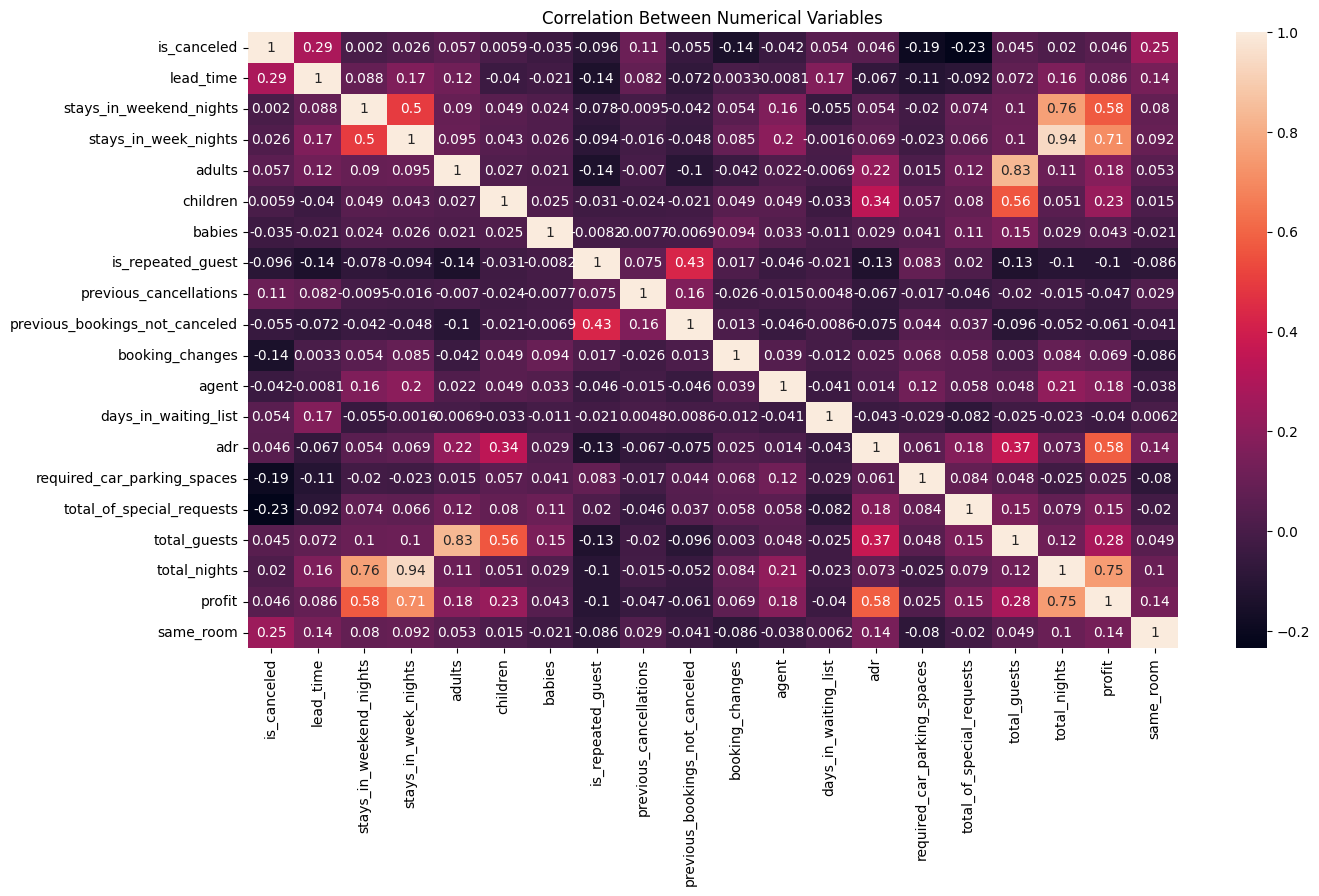

In [ ]:
#check correlation
plt.figure(figsize = (15, 8))
corr = numerical_df.corr()
sns.heatmap(corr, annot = True)
plt.title('Correlation Between Numerical Variables')
plt.show()

In [ ]:
#drop correlated variables
df = df.drop(columns=['stays_in_week_nights','stays_in_weekend_nights','adults','children','babies', 'profit'], axis = 1)

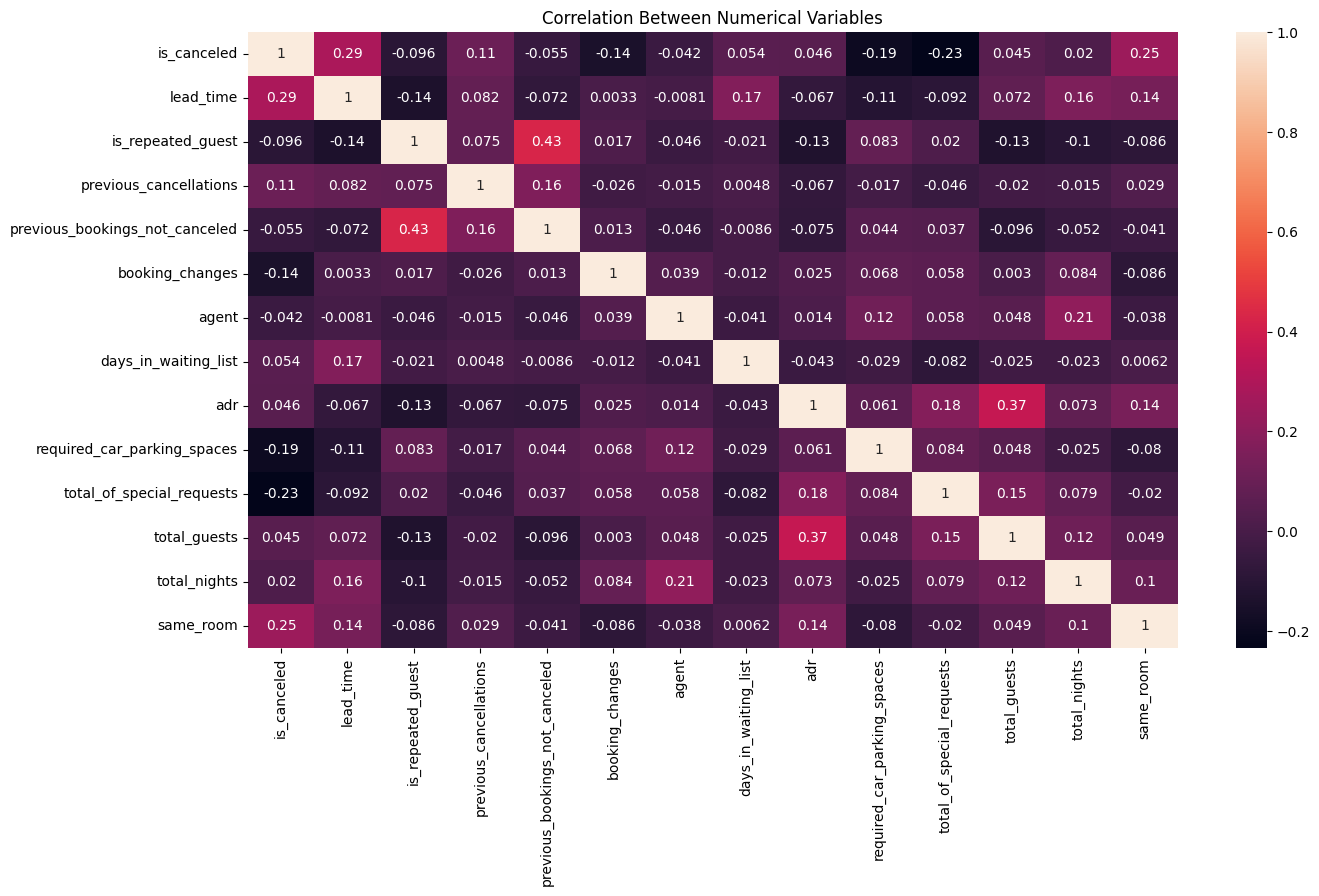

In [ ]:
#check
numerical_df = df.select_dtypes(include='number')

plt.figure(figsize = (15, 8))
corr = numerical_df.corr()
sns.heatmap(corr, annot = True)
plt.title('Correlation Between Numerical Variables')
plt.show()

In [ ]:
X = numerical_df.copy()
X['constant'] = 1

vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
}).sort_values(by='VIF', ascending=False)

print(vif_data)

                          Variable        VIF
14                        constant  17.625103
2                is_repeated_guest   1.280448
0                      is_canceled   1.271362
4   previous_bookings_not_canceled   1.259454
8                              adr   1.242481
1                        lead_time   1.202975
11                    total_guests   1.202114
10       total_of_special_requests   1.126341
12                    total_nights   1.115672
13                       same_room   1.110019
9      required_car_parking_spaces   1.073932
6                            agent   1.072674
3           previous_cancellations   1.050422
7             days_in_waiting_list   1.039280
5                  booking_changes   1.038918


In [ ]:
#check statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,83098.0,0.369792,0.482751,0.0,0.0,0.00,1.0,1.0
lead_time,83098.0,104.047594,106.912851,0.0,18.0,69.00,160.0,737.0
is_repeated_guest,83098.0,0.029796,0.170026,0.0,0.0,0.00,0.0,1.0
previous_cancellations,83098.0,0.086885,0.863827,0.0,0.0,0.00,0.0,26.0
previous_bookings_not_canceled,83098.0,0.141712,1.555358,0.0,0.0,0.00,0.0,70.0
booking_changes,83098.0,0.220595,0.641153,0.0,0.0,0.00,0.0,17.0
agent,83098.0,75.051036,107.293615,0.0,7.0,9.00,154.0,535.0
days_in_waiting_list,83098.0,2.341175,17.814518,0.0,0.0,0.00,0.0,391.0
adr,83098.0,101.881366,47.982657,0.0,70.0,94.97,126.0,508.0
required_car_parking_spaces,83098.0,0.061855,0.245102,0.0,0.0,0.00,0.0,8.0


### Encoding of Categorical Variables

In [ ]:
#categorical variables
categorical_df = df.select_dtypes(include='object')
for col in categorical_df.columns:
    print(f'{col}: \n{categorical_df[col].unique()}\n')

meal: 
['BB' 'HB' 'SC' 'FB' 'Undefined']

market_segment: 
['Online TA' 'Groups' 'Corporate' 'Offline TA/TO' 'Direct' 'Complementary'
 'Aviation' 'Undefined']

distribution_channel: 
['TA/TO' 'Corporate' 'Direct' 'GDS' 'Undefined']

reserved_room_type: 
['A' 'D' 'E' 'G' 'F' 'H' 'B' 'C' 'L']

deposit_type: 
['No Deposit' 'Non Refund' 'Refundable']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']



In [ ]:
#one-hot encoding for the others
df_encoded = pd.get_dummies(df, columns=categorical_df.columns)

### Train test Split

In [ ]:
#features
X = df_encoded.drop(['is_canceled'], axis = 1)
#target
y = df_encoded['is_canceled']

In [ ]:
#split into training and validation data (for testing later)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)  #80% train, 20% testing

In [ ]:
y_train.value_counts()

,count
is_canceled,
0,41929
1,24549


### Outlier Removal

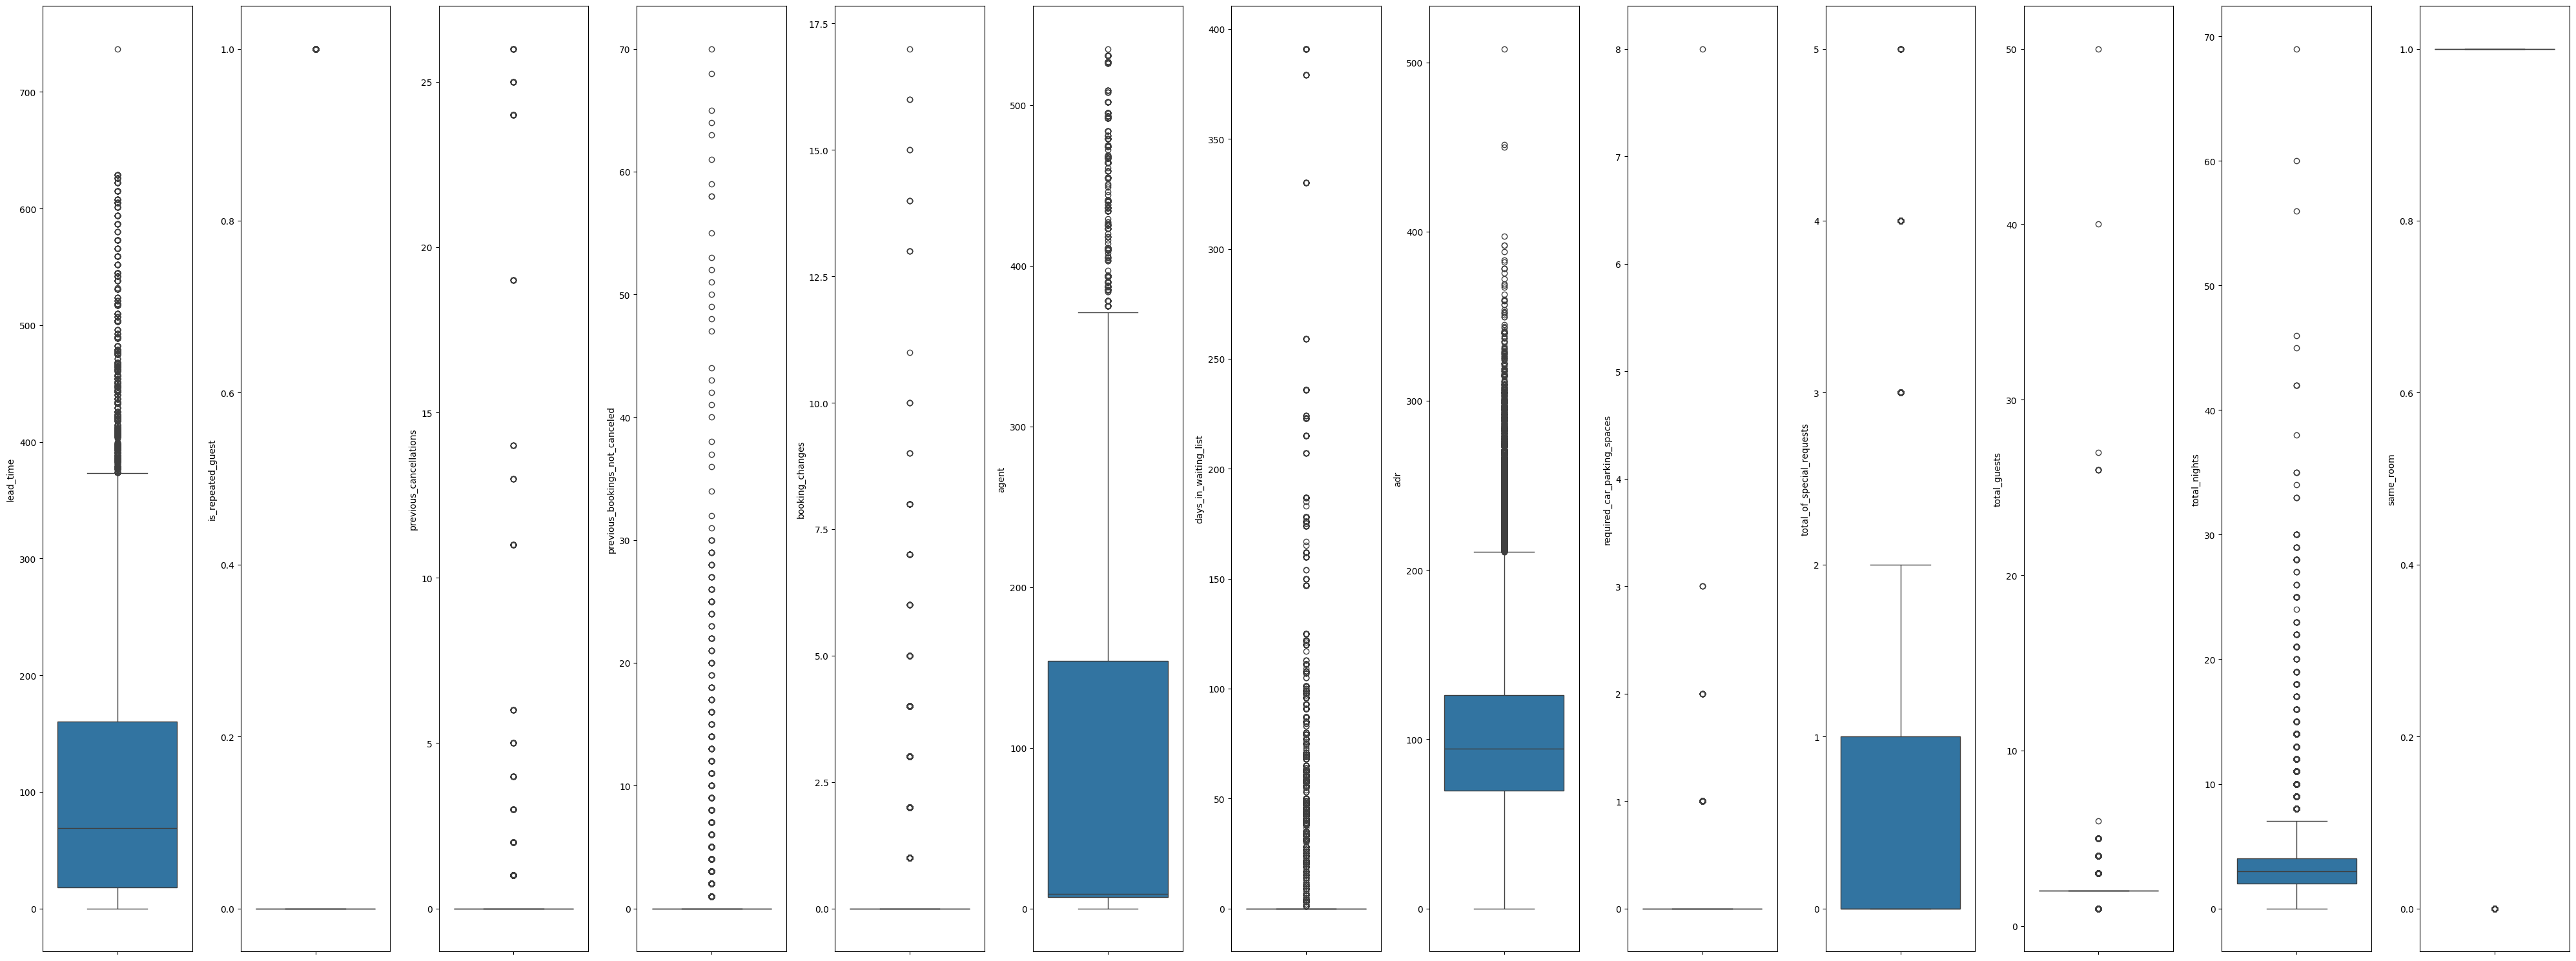

In [ ]:
numerical_cols = numerical_df.columns.drop('is_canceled')

fig, axes = plt.subplots(1,len(numerical_cols), figsize=(40, 15))

for i, column in enumerate(numerical_cols):
    sns.boxplot(y=X_train[column], ax=axes[i])

plt.tight_layout()
plt.show()

The boxplot shows some outliers but this may be due to normally high context, we can scale the data for the prediction model instead of removing the outliers.

### Standardization

In [ ]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

## Model Training and Evaluation

### Logistic Regression

In [ ]:
#define
logreg = LogisticRegression(random_state=42)

#fit
logreg.fit(X_train_scaled, y_train)

#predict
y_pred_train_logreg = logreg.predict(X_train_scaled)
y_pred_train_probs_logreg = logreg.predict_proba(X_train_scaled)[:, 1]

y_pred_test_logreg = logreg.predict(X_test_scaled)
y_pred_test_probs_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

In [ ]:
#evaluate on train
precision = precision_score(y_train, y_pred_train_logreg, pos_label=1)
recall = recall_score(y_train, y_pred_train_logreg, pos_label=1)
f1 = f1_score(y_train, y_pred_train_logreg, pos_label=1)
roc_auc = roc_auc_score(y_train, y_pred_train_probs_logreg)

print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1-Score: {f1:.5f}")
print(f"ROC AUC: {roc_auc:.5f}")

Precision: 0.83037
Recall: 0.62414
F1-Score: 0.71263
ROC AUC: 0.86604


In [ ]:
#evaluate on test
precision = precision_score(y_test, y_pred_test_logreg, pos_label=1)
recall = recall_score(y_test, y_pred_test_logreg, pos_label=1)
f1 = f1_score(y_test, y_pred_test_logreg, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred_test_probs_logreg)

print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1-Score: {f1:.5f}")
print(f"ROC AUC: {roc_auc:.5f}")

Precision: 0.82763
Recall: 0.61456
F1-Score: 0.70536
ROC AUC: 0.86190


### Decision Tree

In [ ]:
#define
dt = DecisionTreeClassifier(random_state=42)

#fit
dt.fit(X_train_scaled, y_train)

#predict
y_pred_train_dt = dt.predict(X_train_scaled)
y_pred_train_probs_dt = dt.predict_proba(X_train_scaled)[:, 1]

y_pred_test_dt = dt.predict(X_test_scaled)
y_pred_test_probs_dt = dt.predict_proba(X_test_scaled)[:, 1]

In [ ]:
#evaluate on train
precision = precision_score(y_train, y_pred_train_dt, pos_label=1)
recall = recall_score(y_train, y_pred_train_dt, pos_label=1)
f1 = f1_score(y_train, y_pred_train_dt, pos_label=1)
roc_auc = roc_auc_score(y_train, y_pred_train_probs_dt)

print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1-Score: {f1:.5f}")
print(f"ROC AUC: {roc_auc:.5f}")

Precision: 0.99439
Recall: 0.98122
F1-Score: 0.98776
ROC AUC: 0.99978


In [ ]:
#evaluate on test
precision = precision_score(y_test, y_pred_test_dt, pos_label=1)
recall = recall_score(y_test, y_pred_test_dt, pos_label=1)
f1 = f1_score(y_test, y_pred_test_dt, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred_test_probs_dt)

print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1-Score: {f1:.5f}")
print(f"ROC AUC: {roc_auc:.5f}")

Precision: 0.75910
Recall: 0.75615
F1-Score: 0.75762
ROC AUC: 0.81082


### Random Forest

In [ ]:
#define
rf = RandomForestClassifier(random_state=42)

#fit
rf.fit(X_train_scaled, y_train)

#predict
y_pred_train_rf = rf.predict(X_train_scaled)
y_pred_train_probs_rf = rf.predict_proba(X_train_scaled)[:, 1]

y_pred_test_rf = rf.predict(X_test_scaled)
y_pred_test_probs_rf = rf.predict_proba(X_test_scaled)[:, 1]

In [ ]:
#evaluate on train
precision = precision_score(y_train, y_pred_train_rf, pos_label=1)
recall = recall_score(y_train, y_pred_train_rf, pos_label=1)
f1 = f1_score(y_train, y_pred_train_rf, pos_label=1)
roc_auc = roc_auc_score(y_train, y_pred_train_probs_rf)

print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1-Score: {f1:.5f}")
print(f"ROC AUC: {roc_auc:.5f}")

Precision: 0.99183
Recall: 0.98375
F1-Score: 0.98777
ROC AUC: 0.99893


In [ ]:
#evaluate on test
precision = precision_score(y_test, y_pred_test_rf, pos_label=1)
recall = recall_score(y_test, y_pred_test_rf, pos_label=1)
f1 = f1_score(y_test, y_pred_test_rf, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred_test_probs_rf)

print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1-Score: {f1:.5f}")
print(f"ROC AUC: {roc_auc:.5f}")

Precision: 0.84425
Recall: 0.75259
F1-Score: 0.79579
ROC AUC: 0.92161


### XGBoost

In [ ]:
#define
xgb = XGBClassifier(random_state=42)

#fit
xgb.fit(X_train_scaled, y_train)

#predict
y_pred_train_xgb = xgb.predict(X_train_scaled)
y_pred_train_probs_xgb = xgb.predict_proba(X_train_scaled)[:, 1]

y_pred_test_xgb = xgb.predict(X_test_scaled)
y_pred_test_probs_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

In [ ]:
#evaluate on train
precision = precision_score(y_train, y_pred_train_xgb, pos_label=1)
recall = recall_score(y_train, y_pred_train_xgb, pos_label=1)
f1 = f1_score(y_train, y_pred_train_xgb, pos_label=1)
roc_auc = roc_auc_score(y_train, y_pred_train_probs_xgb)

print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1-Score: {f1:.5f}")
print(f"ROC AUC: {roc_auc:.5f}")

Precision: 0.87325
Recall: 0.73893
F1-Score: 0.80049
ROC AUC: 0.93657


In [ ]:
#evaluate on test
precision = precision_score(y_test, y_pred_test_xgb, pos_label=1)
recall = recall_score(y_test, y_pred_test_xgb, pos_label=1)
f1 = f1_score(y_test, y_pred_test_xgb, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred_test_probs_xgb)

print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1-Score: {f1:.5f}")
print(f"ROC AUC: {roc_auc:.5f}")

Precision: 0.85834
Recall: 0.71181
F1-Score: 0.77824
ROC AUC: 0.91835


## Hyperparameter Tuning for Random Forest

### Tuned Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer

#define model
tuned_rf = RandomForestClassifier(random_state=42)

#define parameters
param_grid = {
    'n_estimators': [50, 80, 100],
    'max_depth': [20, 30, 40],
    'min_samples_split': [15, 20, 25],
    'min_samples_leaf': [0.5, 1, 2],
    'max_features': ['log2']
}

#set up cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#set up f1 scoring
f1_scorer = make_scorer(f1_score)

#random search
random_search = RandomizedSearchCV(tuned_rf, param_grid, n_iter=10, cv=5, scoring=f1_scorer, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

#the best parameter
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'n_estimators': 80, 'min_samples_split': 25, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40}
Best score:  0.7794898783501297


In [ ]:
#retrieve model
tuned_model = random_search.best_estimator_

#predict on train and test
tuned_pred_train = tuned_model.predict(X_train)
tuned_pred_train_probs = tuned_model.predict_proba(X_train)[:, 1]

tuned_pred_test = tuned_model.predict(X_test)
tuned_pred_test_probs = tuned_model.predict_proba(X_test)[:, 1]

#evaluate
tuned_train_metrics = {
    'Precision': precision_score(y_train, tuned_pred_train, pos_label=1),
    'Recall': recall_score(y_train, tuned_pred_train, pos_label=1),
    'F1-Score': f1_score(y_train, tuned_pred_train, pos_label=1),
    'ROC AUC': roc_auc_score(y_train, tuned_pred_train_probs)
}

tuned_test_metrics = {
    'Precision': precision_score(y_test, tuned_pred_test, pos_label=1),
    'Recall': recall_score(y_test, tuned_pred_test, pos_label=1),
    'F1-Score': f1_score(y_test, tuned_pred_test, pos_label=1),
    'ROC AUC': roc_auc_score(y_test, tuned_pred_test_probs)
}

tuned_evaluation_df = pd.DataFrame([tuned_train_metrics, tuned_test_metrics], index=['Train', 'Test'])
tuned_evaluation_df

,Precision,Recall,F1-Score,ROC AUC
Train,0.908369,0.773311,0.835416,0.963511
Test,0.863494,0.713430,0.781322,0.921973


### Tuned Ranfom Forest with SMOTE

Since the target data is imbalance, we can try to improve using oversampling techniques, such as SMOTE:

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

#define model
smote_rf = RandomForestClassifier(random_state=42)

#define parameters
smote_param_grid = {
    'rf__n_estimators': [50, 80, 100],
    'rf__max_depth': [20, 30, 40],
    'rf__min_samples_split': [15, 20, 25],
    'rf__min_samples_leaf': [0.5, 1, 2],
    'rf__max_features': ['log2']
}

#set up pipeline
pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),  #apply SMOTE to training data within in each fold
    ('rf', smote_rf)
])

#set up cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#set up scoring
f1_scorer = make_scorer(f1_score)

#random search
smote_random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=smote_param_grid, n_iter=10, cv=cv, scoring=f1_scorer, random_state=42, verbose=1)

#fit
smote_random_search.fit(X_train, y_train)

#the best parameter
print("Best set of hyperparameters: ", smote_random_search.best_params_)
print("Best F1 score: ", smote_random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best set of hyperparameters:  {'rf__n_estimators': 80, 'rf__min_samples_split': 25, 'rf__min_samples_leaf': 1, 'rf__max_features': 'log2', 'rf__max_depth': 40}
Best F1 score:  0.7900437114135486


In [ ]:
#retrieve model
smote_model = smote_random_search.best_estimator_

#predict on train and test
smote_pred_train = smote_model.predict(X_train)
smote_pred_train_probs = smote_model.predict_proba(X_train)[:, 1]

smote_pred_test = smote_model.predict(X_test)
smote_pred_test_probs = smote_model.predict_proba(X_test)[:, 1]

#evaluate
smote_train_metrics = {
    'Precision': precision_score(y_train, smote_pred_train, pos_label=1),
    'Recall': recall_score(y_train, smote_pred_train, pos_label=1),
    'F1-Score': f1_score(y_train, smote_pred_train, pos_label=1),
    'ROC AUC': roc_auc_score(y_train, smote_pred_train_probs)
}

smote_test_metrics = {
    'Precision': precision_score(y_test, smote_pred_test, pos_label=1),
    'Recall': recall_score(y_test, smote_pred_test, pos_label=1),
    'F1-Score': f1_score(y_test, smote_pred_test, pos_label=1),
    'ROC AUC': roc_auc_score(y_test, smote_pred_test_probs)
}

smote_evaluation_df = pd.DataFrame([smote_train_metrics, smote_test_metrics], index=['Train', 'Test'])
smote_evaluation_df

,Precision,Recall,F1-Score,ROC AUC
Train,0.881563,0.81319,0.845997,0.962903
Test,0.834055,0.74822,0.788809,0.921406


## Model Analysis

<Figure size 800x600 with 0 Axes>

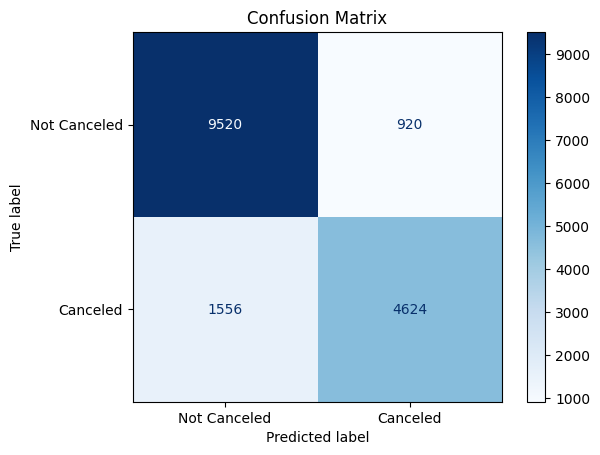

In [84]:
#confusion matrix of random forest result
cm = confusion_matrix(y_test, smote_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Canceled', 'Canceled'])

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

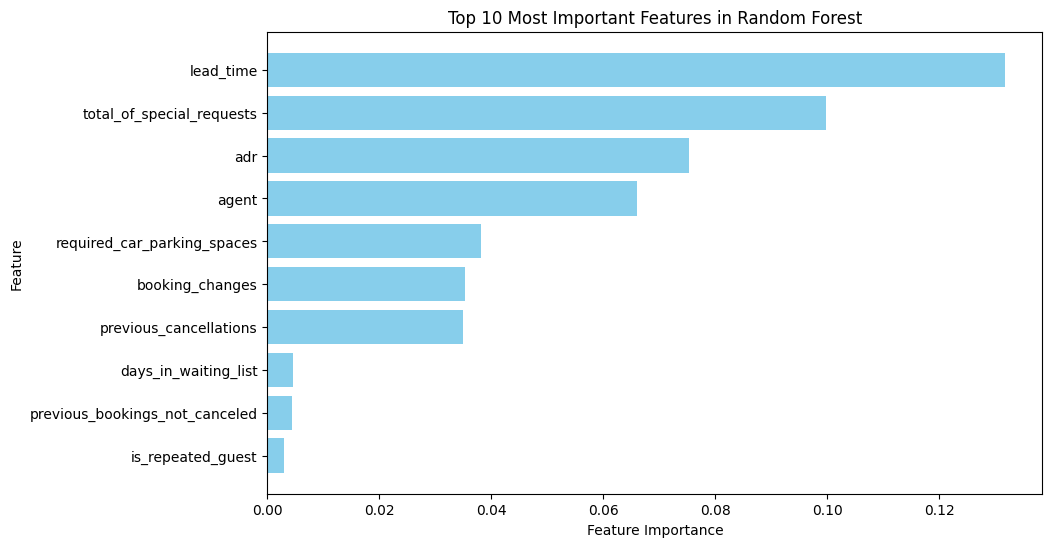

                          Feature  Importance
0                       lead_time    0.131811
9       total_of_special_requests    0.099814
7                             adr    0.075209
5                           agent    0.066001
8     required_car_parking_spaces    0.038185
4                 booking_changes    0.035198
2          previous_cancellations    0.034922
6            days_in_waiting_list    0.004614
3  previous_bookings_not_canceled    0.004403
1               is_repeated_guest    0.003019


In [85]:
best_pipeline = smote_random_search.best_estimator_ #get the best pipeline
best_rf = best_pipeline.named_steps['rf'] #extract the Random Forest model

importances = best_rf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

top_10_features = feature_importance_df.head(10).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features in Random Forest')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()

print(top_10_features)